# Introduction
## This project is about predicting the position of players based on their personal information and in-game stat.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Data Explore

## Open csv file

In [2]:
player1 = pd.read_csv("player_data.csv")
player2 = pd.read_csv("Players.csv", index_col="id")
ss_stat = pd.read_csv("Seasons_Stats.csv", index_col="id")
player1.head(10)


,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


In [3]:
player2.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
id,,,,,,,
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey


In [4]:
ss_stat.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
id,,,,,,,,,,,,,,,,,,,,,
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0


In [5]:
ss_stat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22  DWS

In [6]:
ss_stat.describe()

,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,...,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,...,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,...,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,...,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,...,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,...,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,...,1.000000,587.000000,1111.000000,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000


# Data Cleaning

## 1. Season Stat df

### Since three point shoot first time appears in NBA in 1979, so we only take the stat from 1979

In [7]:
df = ss_stat.loc[ss_stat["Year"] > 1979]
df.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
id,,,,,,,,,,,,,,,,,,,,,
5727,1980.0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,NaN,3143.0,25.3,0.639,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980.0,Tom Abernethy,PF,25.0,GSW,67.0,NaN,1222.0,11.0,0.511,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980.0,Alvan Adams,C,25.0,PHO,75.0,NaN,2168.0,19.2,0.571,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980.0,Tiny Archibald*,PG,31.0,BOS,80.0,80.0,2864.0,15.3,0.574,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5731,1980.0,Dennis Awtrey,C,31.0,CHI,26.0,NaN,560.0,7.4,0.524,...,0.640,29.0,86.0,115.0,40.0,12.0,15.0,27.0,66.0,86.0
5732,1980.0,Gus Bailey,SG,28.0,WSB,20.0,NaN,180.0,9.3,0.467,...,0.385,6.0,22.0,28.0,26.0,7.0,4.0,11.0,18.0,38.0
5733,1980.0,James Bailey,PF,22.0,SEA,67.0,NaN,726.0,12.3,0.495,...,0.673,71.0,126.0,197.0,28.0,21.0,54.0,79.0,116.0,312.0
5734,1980.0,Greg Ballard,SF,25.0,WSB,82.0,NaN,2438.0,18.1,0.532,...,0.753,240.0,398.0,638.0,159.0,90.0,36.0,133.0,197.0,1277.0
5735,1980.0,Mike Bantom,SF,28.0,IND,77.0,NaN,2330.0,13.7,0.533,...,0.665,192.0,264.0,456.0,279.0,85.0,49.0,189.0,268.0,908.0


In [8]:
df.shape

(18927, 52)

### check duplicated

In [9]:
player1.duplicated().any()

False

In [10]:
player2.duplicated().any()

False

In [11]:
ss_stat.duplicated().any()

True

In [12]:
df.duplicated().any()

False

In [13]:
df["Player"].duplicated().any()

True

### Some data on the same player but on different teams, we need to process to easily make predictions.
#### first of all, we need to drop some column that do not related to the target


In [14]:
# some feature that strongly related to the position of a players in season stat
# [TS%, ORB%, TRB%, AST%, BLK%, 3P%, 2P%, TRB, AST, BlK] and player, pos

In [15]:
new_df = df[["Player", "G","Pos", "TS%", "TRB%", "AST%", "BLK%", "3P%", "2P%", "TRB", "AST", "BLK", "PTS"]]

In [16]:
new_df.head(10)

,Player,G,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,TRB,AST,BLK,PTS
id,,,,,,,,,,,,,
5727,Kareem Abdul-Jabbar*,82.0,C,0.639,15.4,16.5,4.6,0.000,0.604,886.0,371.0,280.0,2034.0
5728,Tom Abernethy,67.0,PF,0.511,8.6,9.3,0.6,0.000,0.483,191.0,87.0,12.0,362.0
5729,Alvan Adams,75.0,C,0.571,15.4,21.6,1.4,0.000,0.533,609.0,322.0,55.0,1118.0
5730,Tiny Archibald*,80.0,PG,0.574,3.8,30.2,0.2,0.222,0.488,197.0,671.0,10.0,1131.0
5731,Dennis Awtrey,26.0,C,0.524,11.5,9.0,1.5,NaN,0.450,115.0,40.0,15.0,86.0
5732,Gus Bailey,20.0,SG,0.467,7.8,17.8,1.2,1.000,0.441,28.0,26.0,4.0,38.0
5733,James Bailey,67.0,PF,0.495,14.3,5.3,4.1,NaN,0.450,197.0,28.0,54.0,312.0
5734,Greg Ballard,82.0,SF,0.532,13.1,9.7,0.8,0.340,0.502,638.0,159.0,36.0,1277.0
5735,Mike Bantom,77.0,SF,0.533,10.1,15.9,1.1,0.333,0.506,456.0,279.0,49.0,908.0


In [17]:
new_df.shape

(18927, 13)

### Since as many as the games players played, the statistic is more accuracy, we only take player who played not really less than average per season.

In [18]:
# find the average game players played
avr = new_df['G'].mean()

In [19]:
avr

49.639509695144504

In [20]:
#avr game is nearly 50 so we take 40 games as standard

In [21]:
new_df = new_df.loc[new_df["G"] > 40.0]

In [22]:
new_df.head(10)
new_df.shape

(11912, 13)

### check again the duplicated players

In [23]:
new_df['Player'].duplicated().any()

True

In [24]:
dup = new_df['Player'].duplicated()
dup

id
5727     False
5728     False
5729     False
5730     False
5733     False
         ...  
24684     True
24685     True
24686     True
24687     True
24689    False
Name: Player, Length: 11912, dtype: bool

In [25]:
# Assuming your DataFrame is named new_df and you want to find duplicated rows in the 'Player' column
dup_rows = new_df[new_df['Player'].duplicated()]

# Display the duplicated rows
print(dup_rows)



               Player     G Pos    TS%  TRB%  AST%  BLK%    3P%    2P%    TRB  \
id                                                                              
5744      Kent Benson  56.0   C  0.519  13.0  11.8   2.9  0.000  0.495  333.0   
5752        Ron Boone  75.0  SG  0.506   5.5  19.3   0.1  0.380  0.451  216.0   
5756      Tom Boswell  61.0  PF  0.617  12.3  10.9   1.1  0.500  0.574  328.0   
5780       Kenny Carr  74.0  PF  0.527  16.9   5.7   1.5  0.000  0.496  571.0   
5794     Jim Cleamons  57.0  PG  0.523   4.3  20.7   0.3  0.174  0.503  133.0   
...               ...   ...  ..    ...   ...   ...   ...    ...    ...    ...   
24677     Jeff Withey  51.0   C  0.588  16.2   2.5   6.0  0.000  0.539  121.0   
24684      Nick Young  60.0  SG  0.588   4.8   5.8   0.7  0.404  0.481  137.0   
24685  Thaddeus Young  74.0  PF  0.562  11.3   8.4   1.2  0.381  0.557  449.0   
24686     Cody Zeller  62.0  PF  0.604  12.9   9.1   3.0  0.000  0.572  405.0   
24687    Tyler Zeller  51.0 

### The duplicated at the name of players is not really affect to the model, since their data in two different team is the same as 2 players separatedly


In [26]:
# Data cleaning (drop nan...)

<Axes: ylabel='id'>

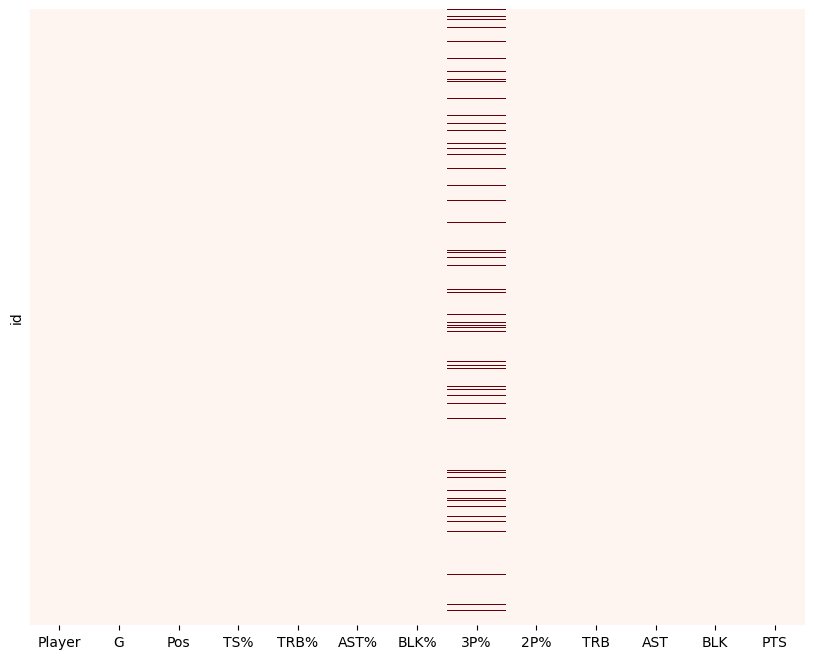

In [27]:
fig, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(new_df.isna(), cmap = "Reds", cbar=False, yticklabels=False)

In [28]:
missing_count_3p = df['3P%'].isna().sum()
print(f"Number of rows with missing values in '3P%': {missing_count_3p}")


Number of rows with missing values in '3P%': 3511


In [29]:
# Calculate the mean of the 3P% column
mean_3p = new_df['3P%'].mean()

# Fill missing values in the 3P% column with the mean
new_df['3P%'].fillna(mean_3p, inplace=True)


<Axes: ylabel='id'>

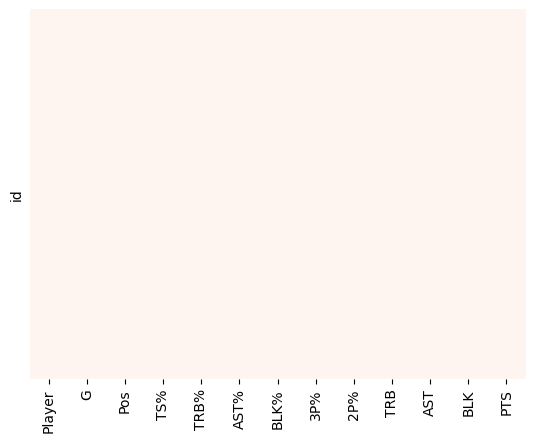

In [30]:
sns.heatmap(new_df.isna(), cmap = "Reds", cbar=False, yticklabels=False)

In [31]:
#for each value in col TRB% AST% or BLK %, the percentage should be devided by 100
#also we should add the column TRB/match, AST/match, BLK/match, PTS/match, it would be more accurate

In [32]:

new_df[["TRB%", "AST%", "BLK%"]] = new_df[["TRB%", "AST%", "BLK%"]]/100

In [33]:
new_df.head(10)

,Player,G,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,TRB,AST,BLK,PTS
id,,,,,,,,,,,,,
5727,Kareem Abdul-Jabbar*,82.0,C,0.639,0.154,0.165,0.046,0.000000,0.604,886.0,371.0,280.0,2034.0
5728,Tom Abernethy,67.0,PF,0.511,0.086,0.093,0.006,0.000000,0.483,191.0,87.0,12.0,362.0
5729,Alvan Adams,75.0,C,0.571,0.154,0.216,0.014,0.000000,0.533,609.0,322.0,55.0,1118.0
5730,Tiny Archibald*,80.0,PG,0.574,0.038,0.302,0.002,0.222000,0.488,197.0,671.0,10.0,1131.0
5733,James Bailey,67.0,PF,0.495,0.143,0.053,0.041,0.252813,0.450,197.0,28.0,54.0,312.0
5734,Greg Ballard,82.0,SF,0.532,0.131,0.097,0.008,0.340000,0.502,638.0,159.0,36.0,1277.0
5735,Mike Bantom,77.0,SF,0.533,0.101,0.159,0.011,0.333000,0.506,456.0,279.0,49.0,908.0
5737,Rick Barry*,72.0,SF,0.517,0.072,0.204,0.009,0.330000,0.458,236.0,268.0,28.0,866.0
5743,Kent Benson,73.0,C,0.513,0.129,0.122,0.027,0.200000,0.486,453.0,178.0,92.0,698.0


## 2. player_data df (player1)

In [34]:
player1.head(10)

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University
9,Alex Abrines,2017,2018,G-F,6-6,190.0,"August 1, 1993",NaN


In [35]:
player1.info

<bound method DataFrame.info of                      name  year_start  year_end position height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1         Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2     Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   
3      Mahmoud Abdul-Rauf        1991      2001        G    6-1   162.0   
4       Tariq Abdul-Wahad        1998      2003        F    6-6   223.0   
...                   ...         ...       ...      ...    ...     ...   
4545           Ante Zizic        2018      2018      F-C   6-11   250.0   
4546             Jim Zoet        1983      1983        C    7-1   240.0   
4547            Bill Zopf        1971      1971        G    6-1   170.0   
4548          Ivica Zubac        2017      2018        C    7-1   265.0   
4549           Matt Zunic        1949      1949      G-F    6-3   195.0   

             birth_date                                college  
0 

In [36]:
# CHOOSE THE FEATURE THAT NEEDED FOR THE MODEL
# there is position col in the dataframe before so no need more
# we need to keep [name, height, weight]

In [37]:
player1_df = player1[["name", "height", "weight"]]
player1_df.head(10)

,name,height,weight
0,Alaa Abdelnaby,6-10,240.0
1,Zaid Abdul-Aziz,6-9,235.0
2,Kareem Abdul-Jabbar,7-2,225.0
3,Mahmoud Abdul-Rauf,6-1,162.0
4,Tariq Abdul-Wahad,6-6,223.0
5,Shareef Abdur-Rahim,6-9,225.0
6,Tom Abernethy,6-7,220.0
7,Forest Able,6-3,180.0
8,John Abramovic,6-3,195.0
9,Alex Abrines,6-6,190.0


In [38]:
#change the name of the first column to 'Player' so that it is much more easy to concat with others

player1_df = player1_df.rename(columns={'name': 'Player'})
player1_df.head(10)

,Player,height,weight
0,Alaa Abdelnaby,6-10,240.0
1,Zaid Abdul-Aziz,6-9,235.0
2,Kareem Abdul-Jabbar,7-2,225.0
3,Mahmoud Abdul-Rauf,6-1,162.0
4,Tariq Abdul-Wahad,6-6,223.0
5,Shareef Abdur-Rahim,6-9,225.0
6,Tom Abernethy,6-7,220.0
7,Forest Able,6-3,180.0
8,John Abramovic,6-3,195.0
9,Alex Abrines,6-6,190.0


In [39]:
# Check if there are any string 'nan' values in the height column
player1_df[player1_df['height'] == 'nan']

,Player,height,weight


In [40]:
# Replace string 'nan' with actual NaN
player1_df['height'].replace('nan', np.nan, inplace=True)
has_nan = player1_df['height'].isnull().sum()
has_nan
data_nan = player1_df.isna().any()
data_nan

Player    False
height     True
weight     True
dtype: bool

<Axes: >

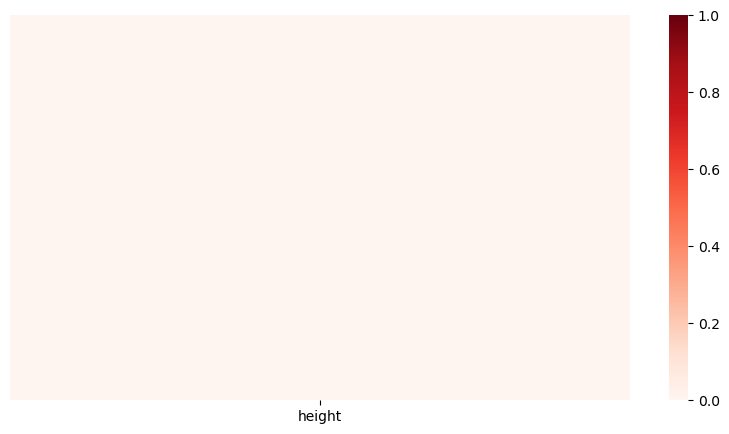

In [41]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.heatmap(player1_df[['height']].isna(), cmap = "Reds", yticklabels=False)

In [42]:
# I'm not really sure about the reason why the heatmap does not show any nan values 
#(I think because there is only 1 nan value comparing with a lot of values, but the has_nan and data_nan variable return true (means there is 1 nan values)

### Clean nan value in player1_df

In [43]:
#find the best algorithm, I think it could be fill by the average values of others. We use SimpleImputer

In [44]:
player1_df.head(10)

,Player,height,weight
0,Alaa Abdelnaby,6-10,240.0
1,Zaid Abdul-Aziz,6-9,235.0
2,Kareem Abdul-Jabbar,7-2,225.0
3,Mahmoud Abdul-Rauf,6-1,162.0
4,Tariq Abdul-Wahad,6-6,223.0
5,Shareef Abdur-Rahim,6-9,225.0
6,Tom Abernethy,6-7,220.0
7,Forest Able,6-3,180.0
8,John Abramovic,6-3,195.0
9,Alex Abrines,6-6,190.0


In [45]:
data_nan = player1_df.isna().any()
data_nan

Player    False
height     True
weight     True
dtype: bool

In [46]:
#create a function that return the height to inches
import pandas as pd
import numpy as np

# Assuming player1_df is your DataFrame
def convert_to_inches(x):
    if isinstance(x, str):
        if '-' in x:
            y = x.split("-")
            return int(y[0]) * 12 + int(y[1])
        else:
            return int(x) * 12
    return x  # If x is NaN or not a string, return as is

player1_df['height'] = player1_df['height'].apply(lambda x: convert_to_inches(x) if pd.notna(x) else x)


In [47]:
data_nan = player1_df.isna().any()
data_nan

Player    False
height     True
weight     True
dtype: bool

In [48]:
X = player1_df.iloc[:, 1:3].values
X

array([[ 82., 240.],
       [ 81., 235.],
       [ 86., 225.],
       ...,
       [ 73., 170.],
       [ 85., 265.],
       [ 75., 195.]])

In [49]:
imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer.fit(X)
X = imputer.transform(X)
X

array([[ 82., 240.],
       [ 81., 235.],
       [ 86., 225.],
       ...,
       [ 73., 170.],
       [ 85., 265.],
       [ 75., 195.]])

In [50]:
player1_df[["height", "weight"]] = X
data_nan = player1_df.isna().any()
data_nan

Player    False
height    False
weight    False
dtype: bool

## 3. pre-process the player.csv file (player2)

In [51]:
player2.head(10)

,Player,height,weight,collage,born,birth_city,birth_state
id,,,,,,,
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
5,Gene Berce,180.0,79.0,Marquette University,1926.0,NaN,NaN
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey


In [52]:
player2_df = player2[['Player', 'height', 'weight']]
player2_df.head(10)

,Player,height,weight
id,,,
0,Curly Armstrong,180.0,77.0
1,Cliff Barker,188.0,83.0
2,Leo Barnhorst,193.0,86.0
3,Ed Bartels,196.0,88.0
4,Ralph Beard,178.0,79.0
5,Gene Berce,180.0,79.0
6,Charlie Black,196.0,90.0
7,Nelson Bobb,183.0,77.0
8,Jake Bornheimer,196.0,90.0


<Axes: ylabel='id'>

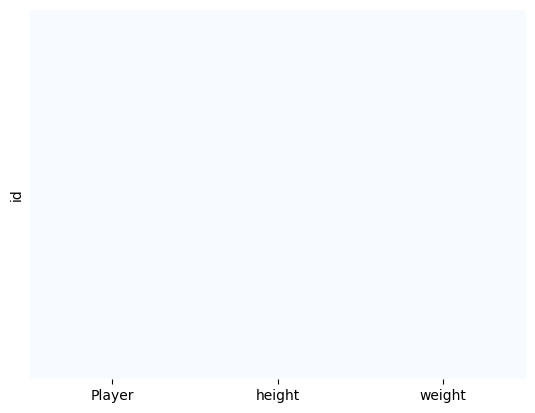

In [53]:
sns.heatmap(player2_df.isna() , cmap = "Blues", cbar=False, yticklabels=False)

In [54]:
#since in player1_df the heatmap not really accurate, we double check the nan value

data_nan2 = player2_df.isna().any()
data_nan2

Player    True
height    True
weight    True
dtype: bool

In [55]:
player2_df = player2_df.dropna(subset=["Player"])
data_nan2 = player2_df.isna().any()
data_nan2

Player    False
height    False
weight    False
dtype: bool

## Concat dataframes

### I think it is a good idea to concat these dataframes base on the name of the players since in the dataframe of season stat, there are more than 1 appearance of some of players

In [56]:
#first of all we need to distinguish the player1_df and the player2_df, let's see if there is any same player from
#these two dataframes

In [57]:
# check if they are 2 separated data frames or there is some same players between 2 df
player1_col = player1_df['Player'];
player2_col = player2_df['Player'];
count = 0;
for player in player1_col:
    if (player in player2_col):
        count += 1;
print(count) #0 -> they are separated data frame

0


In [58]:
player1_df.head(20)

,Player,height,weight
0,Alaa Abdelnaby,82.0,240.0
1,Zaid Abdul-Aziz,81.0,235.0
2,Kareem Abdul-Jabbar,86.0,225.0
3,Mahmoud Abdul-Rauf,73.0,162.0
4,Tariq Abdul-Wahad,78.0,223.0
5,Shareef Abdur-Rahim,81.0,225.0
6,Tom Abernethy,79.0,220.0
7,Forest Able,75.0,180.0
8,John Abramovic,75.0,195.0
9,Alex Abrines,78.0,190.0


In [59]:
player2_df.head(20)

,Player,height,weight
id,,,
0,Curly Armstrong,180.0,77.0
1,Cliff Barker,188.0,83.0
2,Leo Barnhorst,193.0,86.0
3,Ed Bartels,196.0,88.0
4,Ralph Beard,178.0,79.0
5,Gene Berce,180.0,79.0
6,Charlie Black,196.0,90.0
7,Nelson Bobb,183.0,77.0
8,Jake Bornheimer,196.0,90.0


#### - however we notice that their formats are different, we need to fix it 
####  - look like at player1_df the unit is ft and lbs when player2_df is cm and kg
#### - need to create 2 function, from inch to cm and from lbs to kg

In [60]:
def inch_to_cm(height):
    new_height = height*2.54
    return round(new_height, 1)
def lbs_to_kg(weight):
    new_weight = weight*0.453592
    return round(new_weight, 1)
    

In [61]:
list_height = player1_df['height'].tolist()
list_weight = player1_df['weight'].tolist()
list_height[:10]

[82.0, 81.0, 86.0, 73.0, 78.0, 81.0, 79.0, 75.0, 75.0, 78.0]

In [62]:
# Update the height list in place
list_height = [inch_to_cm(i) for i in list_height]

# Update the weight list in place
list_weight = [lbs_to_kg(i) for i in list_weight]


In [63]:
player1_df['height'] = list_height
player1_df['weight'] = list_weight
player1_df.head(10)

,Player,height,weight
0,Alaa Abdelnaby,208.3,108.9
1,Zaid Abdul-Aziz,205.7,106.6
2,Kareem Abdul-Jabbar,218.4,102.1
3,Mahmoud Abdul-Rauf,185.4,73.5
4,Tariq Abdul-Wahad,198.1,101.2
5,Shareef Abdur-Rahim,205.7,102.1
6,Tom Abernethy,200.7,99.8
7,Forest Able,190.5,81.6
8,John Abramovic,190.5,88.5
9,Alex Abrines,198.1,86.2


In [64]:
#now we merge 2 df by the vertical direction
player_df = pd.concat([player1_df, player2_df], ignore_index=True)

## Now we concat the player dataframe and the stat dataframe by the horizontal


In [65]:
new_df.head(10)


,Player,G,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,TRB,AST,BLK,PTS
id,,,,,,,,,,,,,
5727,Kareem Abdul-Jabbar*,82.0,C,0.639,0.154,0.165,0.046,0.000000,0.604,886.0,371.0,280.0,2034.0
5728,Tom Abernethy,67.0,PF,0.511,0.086,0.093,0.006,0.000000,0.483,191.0,87.0,12.0,362.0
5729,Alvan Adams,75.0,C,0.571,0.154,0.216,0.014,0.000000,0.533,609.0,322.0,55.0,1118.0
5730,Tiny Archibald*,80.0,PG,0.574,0.038,0.302,0.002,0.222000,0.488,197.0,671.0,10.0,1131.0
5733,James Bailey,67.0,PF,0.495,0.143,0.053,0.041,0.252813,0.450,197.0,28.0,54.0,312.0
5734,Greg Ballard,82.0,SF,0.532,0.131,0.097,0.008,0.340000,0.502,638.0,159.0,36.0,1277.0
5735,Mike Bantom,77.0,SF,0.533,0.101,0.159,0.011,0.333000,0.506,456.0,279.0,49.0,908.0
5737,Rick Barry*,72.0,SF,0.517,0.072,0.204,0.009,0.330000,0.458,236.0,268.0,28.0,866.0
5743,Kent Benson,73.0,C,0.513,0.129,0.122,0.027,0.200000,0.486,453.0,178.0,92.0,698.0


In [66]:
player_df.head(10)

,Player,height,weight
0,Alaa Abdelnaby,208.3,108.9
1,Zaid Abdul-Aziz,205.7,106.6
2,Kareem Abdul-Jabbar,218.4,102.1
3,Mahmoud Abdul-Rauf,185.4,73.5
4,Tariq Abdul-Wahad,198.1,101.2
5,Shareef Abdur-Rahim,205.7,102.1
6,Tom Abernethy,200.7,99.8
7,Forest Able,190.5,81.6
8,John Abramovic,190.5,88.5
9,Alex Abrines,198.1,86.2


In [67]:
new_df = new_df.merge(player_df, on="Player")
new_df

,Player,G,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,TRB,AST,BLK,PTS,height,weight
0,Kareem Abdul-Jabbar*,82.0,C,0.639,0.154,0.165,0.046,0.000,0.604,886.0,371.0,280.0,2034.0,218.0,102.0
1,Kareem Abdul-Jabbar*,80.0,C,0.616,0.150,0.136,0.040,0.000,0.574,821.0,272.0,228.0,2095.0,218.0,102.0
2,Kareem Abdul-Jabbar*,76.0,C,0.608,0.134,0.119,0.041,0.000,0.580,659.0,225.0,207.0,1818.0,218.0,102.0
3,Kareem Abdul-Jabbar*,79.0,C,0.619,0.128,0.108,0.035,0.000,0.589,592.0,200.0,170.0,1722.0,218.0,102.0
4,Kareem Abdul-Jabbar*,80.0,C,0.608,0.127,0.115,0.029,0.000,0.579,587.0,211.0,143.0,1717.0,218.0,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23458,Isaiah Whitehead,73.0,PG,0.487,0.059,0.177,0.017,0.295,0.446,184.0,192.0,36.0,543.0,193.0,96.0
23459,Alan Williams,47.0,C,0.547,0.224,0.052,0.037,0.000,0.519,292.0,23.0,32.0,346.0,203.2,117.9
23460,Alan Williams,47.0,C,0.547,0.224,0.052,0.037,0.000,0.519,292.0,23.0,32.0,346.0,198.0,90.0
23461,Paul Zipser,44.0,SF,0.503,0.080,0.061,0.015,0.333,0.451,125.0,36.0,16.0,240.0,203.2,97.5


## Feature Classification: Categorical vs Numerical 

In [68]:
train_df = new_df.sample(frac=0.8,random_state=200)
test_df = new_df.drop(train_df.index)

In [69]:
train_df.shape

(18770, 15)

In [70]:
test_df.shape

(4693, 15)

In [71]:
train_df

,Player,G,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,TRB,AST,BLK,PTS,height,weight
12220,Joe Smith,64.0,PF,0.453,0.155,0.053,0.024,0.143000,0.409,157.0,21.0,19.0,194.0,208.3,102.1
318,Bill Cartwright,42.0,C,0.544,0.114,0.105,0.007,0.252813,0.513,152.0,57.0,8.0,235.0,215.9,111.1
4040,Marc Iavaroni,57.0,PF,0.506,0.132,0.119,0.015,0.000000,0.470,275.0,113.0,32.0,381.0,203.2,95.3
4211,Corny Thompson,44.0,PF,0.388,0.124,0.077,0.007,0.252813,0.314,120.0,34.0,7.0,122.0,203.0,102.0
4360,Russell Cross,45.0,C,0.546,0.126,0.088,0.011,0.252813,0.571,82.0,22.0,7.0,166.0,208.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,Jimmy Oliver,44.0,SG,0.473,0.048,0.091,0.001,0.406000,0.418,46.0,33.0,1.0,216.0,195.6,93.0
5068,Steve Colter,43.0,PG,0.514,0.045,0.196,0.004,0.500000,0.470,66.0,116.0,6.0,293.0,190.0,74.0
22045,Chandler Parsons,74.0,SF,0.565,0.082,0.173,0.008,0.370000,0.528,409.0,298.0,29.0,1226.0,208.0,104.0
5364,Sam Perkins,82.0,PF,0.537,0.100,0.089,0.018,0.355000,0.452,367.0,120.0,48.0,970.0,205.7,106.6


## Feature Engineering

### Position

In [72]:
#let visuallize the position of players in genneral

<Axes: xlabel='Pos', ylabel='count'>

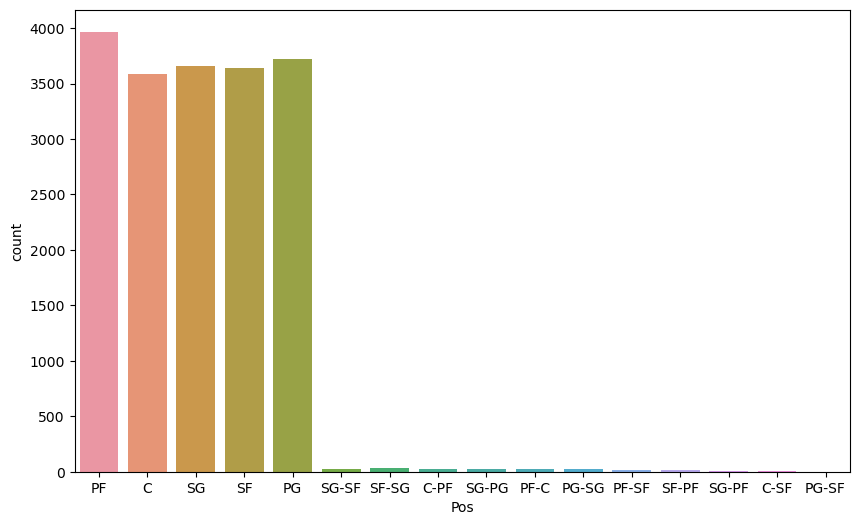

In [73]:
plt.figure(figsize=(10, 6))
sns.countplot(data = train_df, x="Pos")

In [74]:
# as we see from the visualize, the % of combine position is very few compare to single
# we have 2 ways to deal with it: 
#1: drop all of combine pos value
#2: keep only the first pos, since the second is sub-pos
# i will try the 2nd

<Axes: xlabel='Pos', ylabel='count'>

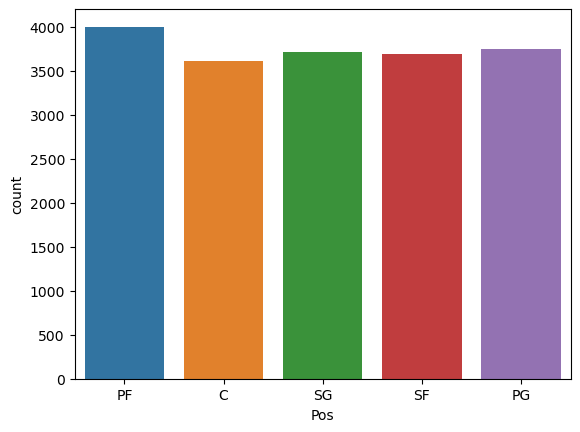

In [75]:
def convert_combine(x):
    
        if '-' in x:
            y = x.split("-")[0]
            return y
        else:
            return x

train_df['Pos'] = train_df['Pos'].apply(lambda x: convert_combine(x))
test_df['Pos'] = test_df['Pos'].apply(lambda x: convert_combine(x))
sns.countplot(data = train_df, x="Pos")

## Game (G)

<Axes: xlabel='G', ylabel='count'>

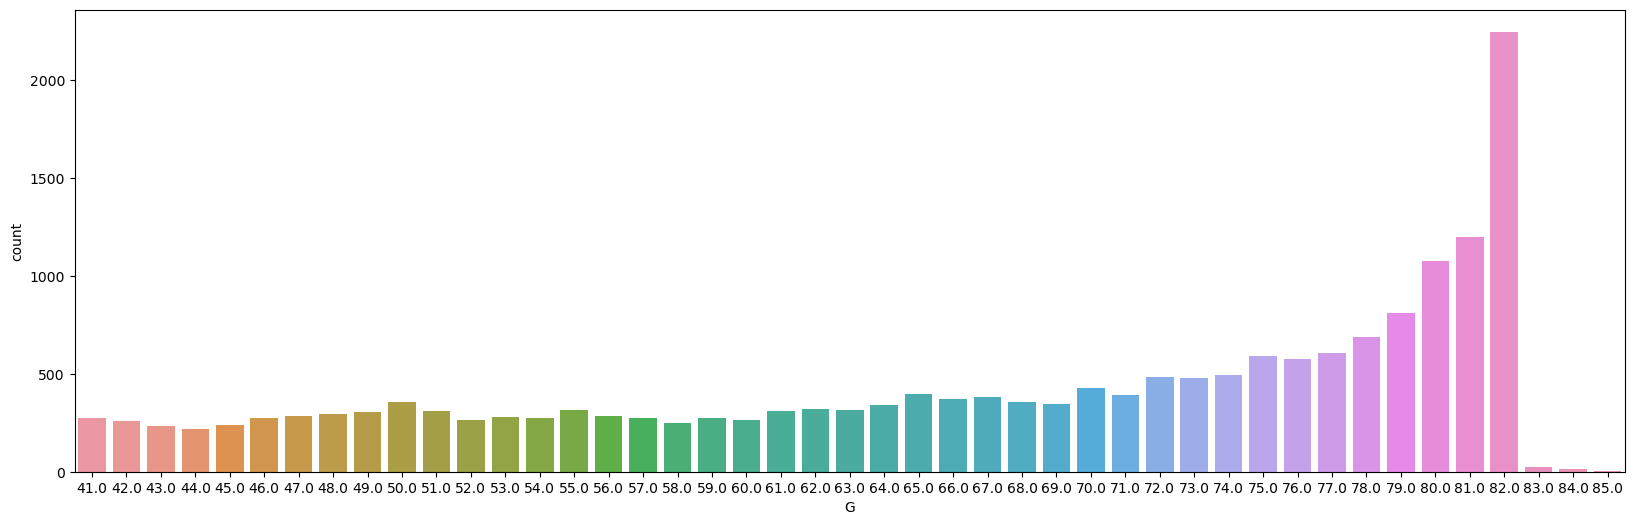

In [76]:
plt.figure(figsize=(20, 6))
sns.countplot(data=train_df, x="G")

<Axes: xlabel='Pos', ylabel='count'>

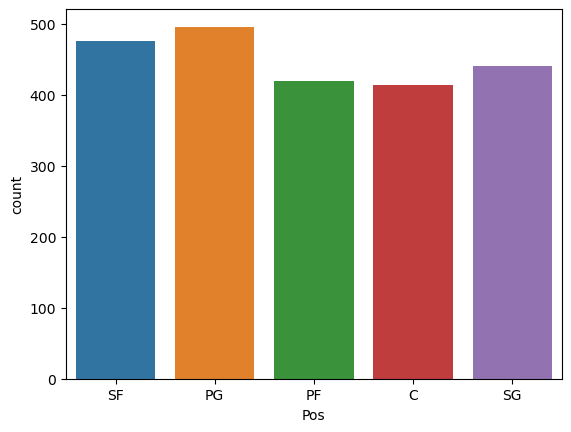

In [77]:
#we see the players that plays 82 is the most, let see what are their pos
game_82 = train_df[train_df["G"] == 82]
sns.countplot(data=game_82, x="Pos")

### The game that each player plays do not really related to their pos, but we will drop it later since we need Game to calculate the avg point per game of player

## TS%

In [78]:
train_df.head()

,Player,G,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,TRB,AST,BLK,PTS,height,weight
12220,Joe Smith,64.0,PF,0.453,0.155,0.053,0.024,0.143000,0.409,157.0,21.0,19.0,194.0,208.3,102.1
318,Bill Cartwright,42.0,C,0.544,0.114,0.105,0.007,0.252813,0.513,152.0,57.0,8.0,235.0,215.9,111.1
4040,Marc Iavaroni,57.0,PF,0.506,0.132,0.119,0.015,0.000000,0.470,275.0,113.0,32.0,381.0,203.2,95.3
4211,Corny Thompson,44.0,PF,0.388,0.124,0.077,0.007,0.252813,0.314,120.0,34.0,7.0,122.0,203.0,102.0
4360,Russell Cross,45.0,C,0.546,0.126,0.088,0.011,0.252813,0.571,82.0,22.0,7.0,166.0,208.0,97.0


In [79]:
train_df["TS%"].describe()

count    18770.000000
mean         0.525793
std          0.047330
min          0.238000
25%          0.497000
50%          0.527000
75%          0.555000
max          0.730000
Name: TS%, dtype: float64

In [80]:
train_df['TScat'] = pd.cut(train_df["TS%"], bins= [0.0, 0.4, 0.6, 1], labels=['low', 'avg', 'high'] )

In [81]:
train_df['TScat'].describe

<bound method NDFrame.describe of 12220    avg
318      avg
4040     avg
4211     low
4360     avg
        ... 
11017    avg
5068     avg
22045    avg
5364     avg
1327     avg
Name: TScat, Length: 18770, dtype: category
Categories (3, object): ['low' < 'avg' < 'high']>

<Axes: xlabel='TScat', ylabel='count'>

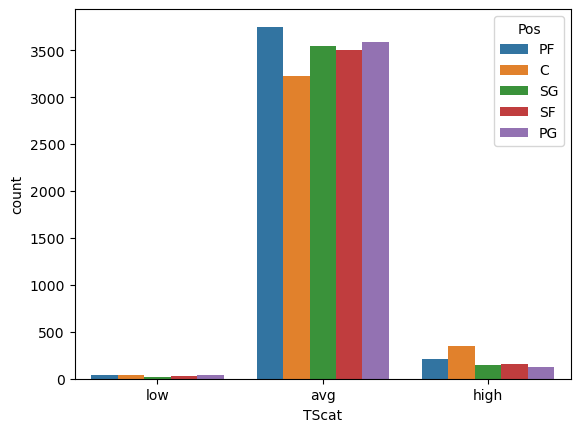

In [82]:
#let see if i do so return a good result
sns.countplot(data=train_df, x='TScat', hue='Pos')

<Axes: xlabel='Pos', ylabel='count'>

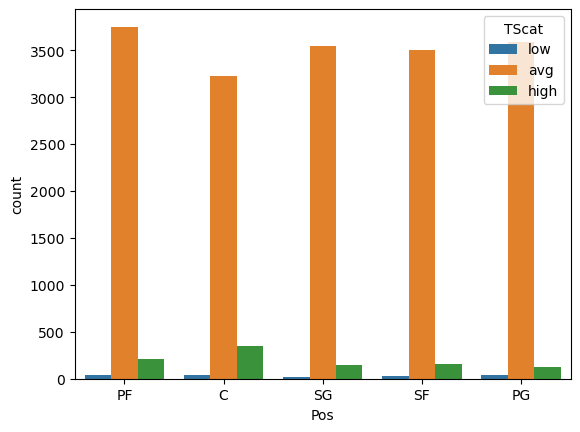

In [83]:
sns.countplot(data=train_df, x='Pos', hue='TScat')

<Axes: xlabel='Pos', ylabel='Count'>

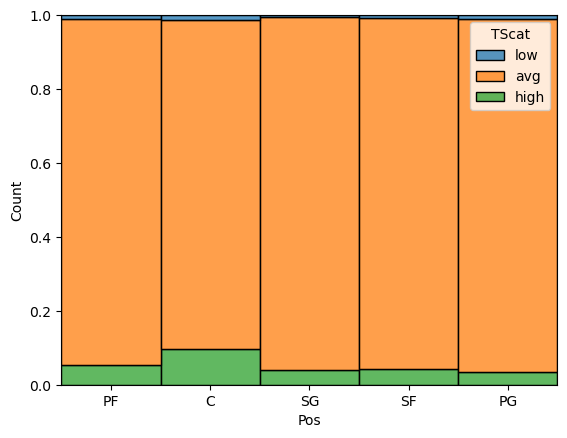

In [84]:
sns.histplot(data=train_df, x="Pos", hue="TScat", multiple="fill", stat="count", discrete=True)

In [85]:
# -> it is seem that change the TS% to category not really efficent so we keep the numerical
train_df = train_df.drop(columns='TScat')

## TRB AST BLK PTS 

In [86]:
#instead of keep the total number of them, we should calculate the avg per game

In [87]:
train_df['RBperG'] = train_df['TRB']/train_df['G']
train_df['ASTperG'] = train_df['AST']/train_df['G']
train_df['BLKperG'] = train_df['BLK']/train_df['G']
train_df['PTSperG'] = train_df['PTS']/train_df['G']
test_df['RBperG'] =test_df['TRB']/test_df['G']
test_df['ASTperG'] = test_df['AST']/test_df['G']
test_df['BLKperG'] = test_df['BLK']/test_df['G']
test_df['PTSperG'] = test_df['PTS']/test_df['G']

In [88]:
train_df = train_df.drop(columns=['G', 'TRB', 'AST', 'BLK', 'PTS'])
test_df = test_df.drop(columns=['G', 'TRB', 'AST', 'BLK', 'PTS'])
train_df

,Player,Pos,TS%,TRB%,AST%,BLK%,3P%,2P%,height,weight,RBperG,ASTperG,BLKperG,PTSperG
12220,Joe Smith,PF,0.453,0.155,0.053,0.024,0.143000,0.409,208.3,102.1,2.453125,0.328125,0.296875,3.031250
318,Bill Cartwright,C,0.544,0.114,0.105,0.007,0.252813,0.513,215.9,111.1,3.619048,1.357143,0.190476,5.595238
4040,Marc Iavaroni,PF,0.506,0.132,0.119,0.015,0.000000,0.470,203.2,95.3,4.824561,1.982456,0.561404,6.684211
4211,Corny Thompson,PF,0.388,0.124,0.077,0.007,0.252813,0.314,203.0,102.0,2.727273,0.772727,0.159091,2.772727
4360,Russell Cross,C,0.546,0.126,0.088,0.011,0.252813,0.571,208.0,97.0,1.822222,0.488889,0.155556,3.688889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11017,Jimmy Oliver,SG,0.473,0.048,0.091,0.001,0.406000,0.418,195.6,93.0,1.045455,0.750000,0.022727,4.909091
5068,Steve Colter,PG,0.514,0.045,0.196,0.004,0.500000,0.470,190.0,74.0,1.534884,2.697674,0.139535,6.813953
22045,Chandler Parsons,SF,0.565,0.082,0.173,0.008,0.370000,0.528,208.0,104.0,5.527027,4.027027,0.391892,16.567568
5364,Sam Perkins,PF,0.537,0.100,0.089,0.018,0.355000,0.452,205.7,106.6,4.475610,1.463415,0.585366,11.829268


## Weight and Height

In [89]:
#check if height weight and PTSperG is normal distribution or not
stats.probplot(train_df['height'], dist="norm", plot=plt)
plt.show()

NameError: name 'stats' is not defined

In [ ]:
stats.probplot(train_df['weight'], dist="norm", plot=plt)
plt.show()

In [ ]:
stats.probplot(train_df['PTSperG'], dist="norm", plot=plt)
plt.show()

### 2 upper features is closely normal distribution but the third is not, however I will use Standard Scaler for both to maintain consistency and easier for the algorithm i will use: logistic regression

In [ ]:
from sklearn.preprocessing import StandardScaler

trans = StandardScaler()
trans_df = train_df[['height', 'weight', 'PTSperG']]
train_df[['height', 'weight', 'PTSperG']] = trans.fit_transform(trans_df)

In [ ]:
train_df

In [ ]:
x_train = train_df.drop(columns="Pos")
x_train = x_train.drop(columns="Player")
y_train = train_df["Pos"]
x_test = test_df.drop(columns="Pos")
x_test = x_test.drop(columns="Player")
y_test = test_df["Pos"]


In [ ]:
x_test

In [ ]:
x_train